#### Université de Bordeaux,  Master Mention Informatique

# Analyse, classification et indexation des données: feuille 4
### Régression linéaire simple et multiple

##### Avant de commencer :

Le régression linéaire est l'une des méthodes statistiques les plus utilisées en sciences de données. Elle est utilisée pour <em>prédire</em> les valeurs d'une variable <em>dépendante</em> continue en fonction d'une ou plusieurs variables <em>indépendantes</em>.


In [ ]:
import pandas as pa

### Exercice 1. Régression linéaire simple.

La gérante d’un commerce veut évaluer l’impact des frais déboursés en publicité par mois (représentés par une variable $X$ exprimée en milliers d’euros) sur le chiffre d’affaires mensuel (représenté par une variable $Y$ exprimée en milliers d’euros). On aimerait évaluer dans quelle mesure une modification du budget publicitaire mensuel affecterait le chiffre d’affaires mensuel. On a donc recueilli sur une période de 10 mois les données du tableau ci-dessous.

<table>
<tr><td>Chiffre d'affaires</td> <td>220</td> <td>280</td> <td>250</td> <td>170</td> <td>150</td> <td>340</td> <td>310</td> <td>210</td> <td>180</td> <td>190</td></tr>
<tr><td>Frais publicitaires</td> <td>2.6</td> <td>2.6</td> <td>2.4</td> <td>1.5</td> <td>0.9</td> <td>3.0</td> <td>2.7</td> <td>2.3</td> <td>1.7</td> <td>1.9</td></tr>

</table>    

1. Créer un <code>DataFrame</code> contenant les données du tableau ci-dessus.

In [2]:
import pandas as pd

data = {
    'Chiffre d\'affaires'= [220, 280, 250, 170, 150, 340, 310, 210, 180, 190],
    'Frais publicitaires': [2.6, 2.6, 2.4, 1.5, 0.9, 3.0, 2.7, 2.3, 1.7, 1.9]
}

df = pd.DataFrame(data)

print(df)

   Chiffre d'affaires  Frais publicitaires
0                 220                  2.6
1                 280                  2.6
2                 250                  2.4
3                 170                  1.5
4                 150                  0.9
5                 340                  3.0
6                 310                  2.7
7                 210                  2.3
8                 180                  1.7
9                 190                  1.9


2. Tracer le nuage de points et estimer le coefficient de corrélation linéaire.

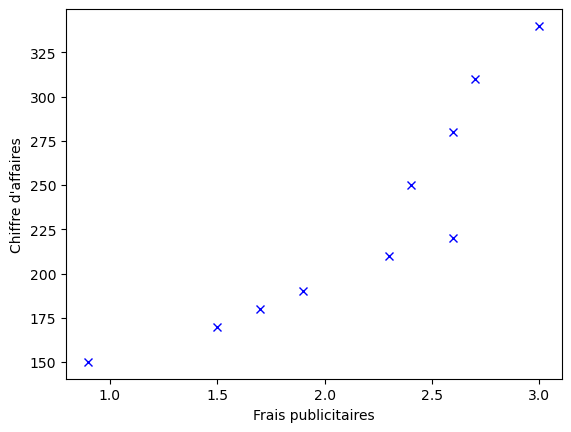

In [7]:
import matplotlib.pyplot as plt
plt.plot(df['Frais publicitaires'], df['Chiffre d\'affaires'] ,'bx')
plt.ylabel('Chiffre d\'affaires')
plt.xlabel('Frais publicitaires')
plt.show()

In [15]:
import scipy.stats

result = scipy.stats.linregress(df['Frais publicitaires'], df['Chiffre d\'affaires'])
print(df['Frais publicitaires'].corr( df['Chiffre d\'affaires']))

print(result.slope)
print(result.intercept)
print(result.rvalue)
print(result.pvalue)
print(result.stderr)

0.8937577901006997
87.40701381509031
41.20085015940495
0.8937577901006998
0.0004894341749604697
15.50930060045945


3. Etablir la droite de régression correspondant à ce problème et tracer cette droite. Vous pouvez utiliser l'instruction <code>linregress</code> du module <code>stats</code>

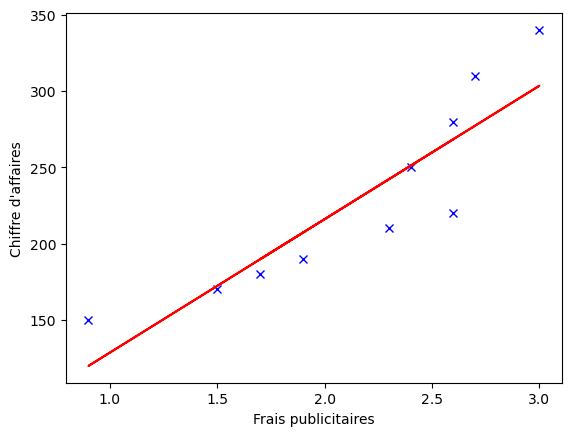

In [17]:
import matplotlib.pyplot as plt
plt.plot(df['Frais publicitaires'], df['Chiffre d\'affaires'] ,'bx')
plt.ylabel('Chiffre d\'affaires')
plt.xlabel('Frais publicitaires')
regression_line = result.slope * df['Frais publicitaires'] + result.intercept
plt.plot(df['Frais publicitaires'], regression_line, color='red', label='Régression linéaire')
plt.show()

4. Tester la significativité de la régression au risque 5%.

In [18]:
if result.pvalue < 0.05:
    print("La régression est significative au risque de 5%.")
else:
    print("La régression n'est pas significative au risque de 5%.")


La régression est significative au risque de 5%.


5. Calculer le coefficient de détermination.

In [20]:
print(" indice de la qualité de la prédiction de la régression linéaire est : (1 etant faible):",result.rvalue**2)

 indice de la qualité de la prédiction de la régression linéaire est : (1 etant faible): 0.7988029873656866


6. Quel serait le chiffre d’affaires mensuel prédit par le modèle pour un budget publicitaire mensuel de 400 euros ? de 4000 euros ?

In [22]:
chiffre_affaires_predit_1 = result.slope * 0.400 + result.intercept

# Prédiction du chiffre d'affaires pour le deuxième budget
chiffre_affaires_predit_2 = result.slope * 4 + result.intercept

# Affichage des prédictions
print("Chiffre d'affaires prévu pour un budget de 400 euros:", chiffre_affaires_predit_1)
print("Chiffre d'affaires prévu pour un budget de 4000 euros:", chiffre_affaires_predit_2)


Chiffre d'affaires prévu pour un budget de 400 euros: 76.16365568544109
Chiffre d'affaires prévu pour un budget de 4000 euros: 390.8289054197662


### Exercice 2. Régression linéaire multiple

Nous voulons savoir quels sont les facteurs importants qui influencent la valeur d’une propriété. L'objectif est de construire un modèle qui nous aidera à évaluer cette valeur selon ces facteurs. Pour ce faire, nous utilisons la valeur totale pour un échantillon de 79 propriétés dans une région donnée. Voir le fichier <code>proprietes.csv</code> disponible à l’adresse :

http://www.labri.fr/~zemmari/ia_data/datasets/proprietes.csv

Le fichier contient les variables suivantes correspondant chacune à un facteur : 
- Valeur Totale : valeur globale de la propriété
- Valeur Terrain : valeur du terrain sur lequel est bâtie la maison
- Acre : Superficie en acres
- Pieds2 : Superficie en pieds2
- Extérieur : Etat extérieur
- Chauffage : Type du chauffage utilisé
- Pièces : Nombre de pièces dans la maison
- Chambres : Nombre de chambres dans la maison
- SbainsC : Nombre de salles de bain complètes
- Sbains : Nombre de salles de bain non complètes
- Foyers : Nombre de foyers
- Garage : Indique si la propriété contient un garage ou non.

Après avoir chargé les données dans un DataFrame vous pouvez visualiser les premières entrées avec la fonction head et inspecter globalement les données avec la fonction info. Y a-t-il des données manquantes?

In [83]:
df = pd.read_csv("http://www.labri.fr/~zemmari/datasets/proprietes.csv", sep=';')

print(df.head())
print(df.info())



   Valeur Totale  Valeur Terrain   Acre  Pied2 Extérieur Chauffage  Pièces  \
0         199657           63247   1,63   1726      Good    NatGas       8   
1          78482           38091  0,495   1184      Good    NatGas       6   
2         119962           37665  0,375   1014      Good  Electric       7   
3         116492           54062  0,981   1260   Average  Electric       6   
4         131263           61546   1,14   1314   Average    NatGas       8   

   Chambre  SbainsC  Sbains  Foyers    Garage  
0        4        2       1       2    Garage  
1        2        1       0       0  NoGarage  
2        3        2       0       1    Garage  
3        3        2       0       1    Garage  
4        4        2       1       2  NoGarage  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Valeur Totale   79 non-null     int64 
 1   Val

1. Y a-t-il un lien entre la valeur totale et les différents facteurs ?

In [80]:
for column in df.columns:
    if column != 'Valeur Totale':
        df[column] = pd.to_numeric(df[column], errors='coerce')
        
        df = df.dropna(subset=[column])
        if len(df[column]) >= 2:
            result = scipy.stats.pearsonr(df['Valeur Totale'], df[column])

            print(f"Corrélation entre Valeur Totale et {column}: {result.statistic}")
            print(f"Valeur p (p-value) pour {column}: {result.pvalue}")

            if result.pvalue  < 0.05:
                print(f"Il existe un lien significatif entre la Valeur Totale et {column}.\n")
            else:
                print(f"Il n'y a pas de lien significatif entre la Valeur Totale et {column}.\n")
        else:
            print(f"La colonne {column} n'a pas suffisamment de données pour calculer une corrélation.\n")

La colonne Valeur Terrain n'a pas suffisamment de données pour calculer une corrélation.

La colonne Acre n'a pas suffisamment de données pour calculer une corrélation.

La colonne Pied2 n'a pas suffisamment de données pour calculer une corrélation.

La colonne Extérieur n'a pas suffisamment de données pour calculer une corrélation.

La colonne Chauffage n'a pas suffisamment de données pour calculer une corrélation.

La colonne Pièces n'a pas suffisamment de données pour calculer une corrélation.

La colonne Chambre n'a pas suffisamment de données pour calculer une corrélation.

La colonne SbainsC n'a pas suffisamment de données pour calculer une corrélation.

La colonne Sbains n'a pas suffisamment de données pour calculer une corrélation.

La colonne Foyers n'a pas suffisamment de données pour calculer une corrélation.

La colonne Garage n'a pas suffisamment de données pour calculer une corrélation.



2. Afficher les valeurs des différentes statistiques desciptives.

In [68]:
print(df['Valeur Totale'].describe())


count        79.000000
mean     187253.405063
std       84401.421337
min       74365.000000
25%      123089.000000
50%      156761.000000
75%      235277.500000
max      453744.000000
Name: Valeur Totale, dtype: float64


3. Faites les différentes régressions linéaires simples possibles, et choisissez la (ou les) plus pertinente(s).

Corrélation entre Valeur Totale et Valeur Terrain: 0.6637115265551455
Valeur p (p-value) pour Valeur Terrain: 6.636865062557978e-20
La régression est significative au risque de 5% entre la Valeur Totale et Valeur Terrain.



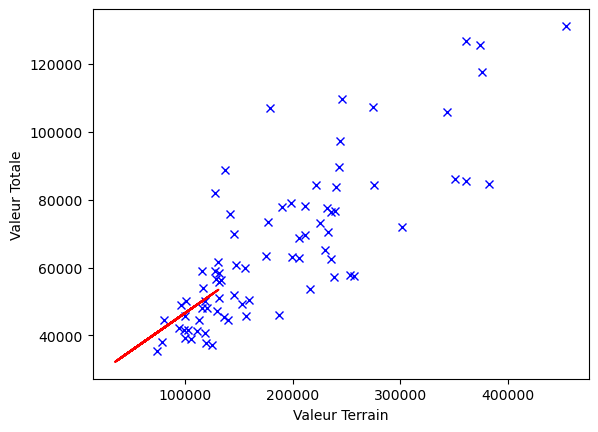

Corrélation entre Valeur Totale et Acre: 1.0
Valeur p (p-value) pour Acre: 0.0
La régression est significative au risque de 5% entre la Valeur Totale et Acre.



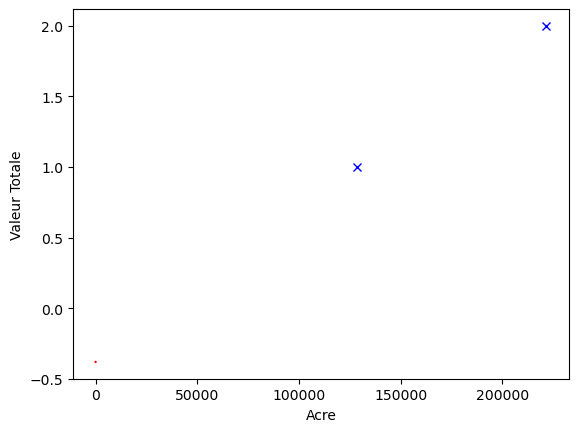

Corrélation entre Valeur Totale et Pied2: 1.0
Valeur p (p-value) pour Pied2: 0.0
La régression est significative au risque de 5% entre la Valeur Totale et Pied2.



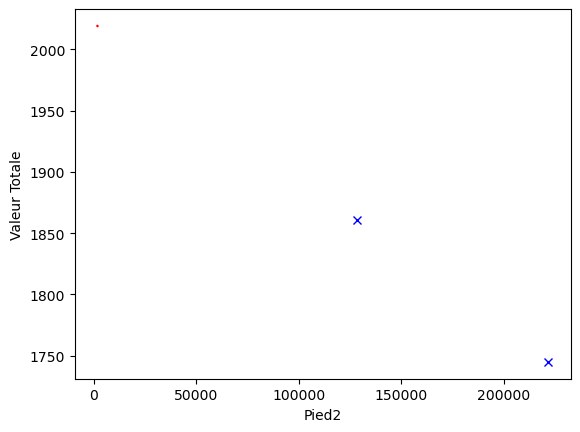

La colonne Extérieur n'a pas suffisamment de données pour calculer une corrélation.

La colonne Chauffage n'a pas suffisamment de données pour calculer une corrélation.

La colonne Pièces n'a pas suffisamment de données pour calculer une corrélation.

La colonne Chambre n'a pas suffisamment de données pour calculer une corrélation.

La colonne SbainsC n'a pas suffisamment de données pour calculer une corrélation.

La colonne Sbains n'a pas suffisamment de données pour calculer une corrélation.

La colonne Foyers n'a pas suffisamment de données pour calculer une corrélation.

La colonne Garage n'a pas suffisamment de données pour calculer une corrélation.



In [84]:
import matplotlib.pyplot as plt

for column in df.columns:
    if column != 'Valeur Totale':
        df[column] = pd.to_numeric(df[column], errors='coerce')
        
        df = df.dropna(subset=[column])
        if len(df[column]) >= 2:
            result = scipy.stats.linregress(df['Valeur Totale'], df[column])
            
            print(f"Corrélation entre Valeur Totale et {column}: {result.rvalue**2}")
            print(f"Valeur p (p-value) pour {column}: {result.pvalue}")

            if result.pvalue < 0.05:
                print(f"La régression est significative au risque de 5% entre la Valeur Totale et {column}.\n")
                plt.plot(df['Valeur Totale'],  df[column] ,'bx')
                plt.ylabel('Valeur Totale')
                plt.xlabel(column)
                regression_line = result.slope * df[column] + result.intercept
                plt.plot(df[column], regression_line, color='red', label='Régression linéaire')
                plt.show()
                
            else:
                print(f"La régression est significative au risque de 5% entre la Valeur Totale et {column}.\n")
        else:
            print(f"La colonne {column} n'a pas suffisamment de données pour calculer une corrélation.\n")



4. Faites la régression multiple de la Valeur totale en fonction des autres facteurs (quand c’est possible). Analysez les résultats obtenus.  Appuyez vous sur l'exemple vu en cours pour la méthode à suivre et l'utilisation de bibliothèques.